In [2]:
import keras
from keras.models import load_model
# import pred_functions
import math
import numpy as np

Using TensorFlow backend.


In [7]:
Seeker = load_model(filepath="/Users/ekremguzelyel/Desktop/Assignments/CS/Hackathons/SpartaHack/model2.h5")

In [3]:
from matplotlib.pyplot import plot
import matplotlib.pyplot as plt

### Put these functions into .py file later on.
def disclaimer():
    # Get user consent
    input("""DISCLAIMER!!
    
    This study may include sensitive questions. I give my consent to proceed. 
    
    I know that my data will not be saved or shared in any place,
    and will be used only for during the test.
    
    Please write your first name:""")
    # Answer all questions with numeric values. Thanks!

def start_survey():
    """ Prompt user the survey questions. Save the answers for
        predictions. 
        
        References: Survey questions align with """
    print("""Please fill the form with numeric values only. 
          
    This survey aligns with the studies of Prof. Elizabeth Blackburn 
    and National Health and Examination Survey.
    """)
    
    # Question 1:
    age = int(input("Age: "))
    if (age>60 or age<20):
        print("You can't participate in the study. Age restriction (20-59)")
        return
    
    ## Question 2:
    gend = input("Gender: (0-Male, 1-Female): ")
    
    
    ### Questions 3:
    height = int(input("Please provide your height (in inches): "))
    weight = int(input("Please provide your weight (in pounds): "))
    
    BMI = math.ceil((weight*703/(height)**2))
    print("BMI (Body-Mass Index): "+ str(BMI))
    
    
    ## Question 4 & 5:
    smq040 = input("""Do you smoke cigarettes?:
        2 - Everyday
        1 - Some days 
        0 - Not at all""")
    
    if smq040!='0':
        smd075 = input("For have many years have you been smoking?: ")
    else:
        smd075 = 0
    
    ## Question 6:
    paq180= input("""Which of these four sentences best describes your usual daily activities?
        3 - You sit during the day and do not walk about very much.
        2 - You stand or walk about a lot during the day, but do not have to carry or lift things very often
        1 - You lift light load or have to climb stairs or hills often.
        0 - You do heavy work or carry heavy loads.""")
    
    ## Question 7:
    paq520 = input("""Compared with most {boys/girls} your age, would you say that you are...
        2 - Less active
        1 - Similarly active
        0 - More active?: """)
    
    
    ## Question 8&9: 
    duq100 = input("Ever used cocaine or other street drug? (1-Yes, 0-No):")
    
    if duq100!='0':
        duq110 = int(input("""In the past 12 months, how many days have you used cocaine,
            including crack or freebase, or other street drugs?: """))
    
    
    ## Question 10:
    alq130 = int(input("How many alcoholic drinks do you consume per day? (1-36):"))
    
    
    print("\n Please proceed to next cell.")
    return [smq040,paq180,paq520,gend,BMI,smd075,alq130,age]

def loadModel():
    Seeker = load_model(filepath="/Users/ekremguzelyel/Desktop/Assignments/CS/Hackathons/SpartaHack/model2.h5")
    return Seeker

def predict_value(Seeker, pred_input):
    return 11000 - Seeker.predict(np.array([pred_input,]))[0]

def plot_disease_span(answers):
    pred_values=[]
    age_values=[]
    stopped_smoking=[]
    more_exercise=[]
    for i in range(5):
        pred_input = answers[:-1]
        pred_input.append((answers[-1]+(i*10)))

        pred_values.append(predict_value(Seeker,pred_input)*(1+(1/(i+2))))
        stopped_smoking.append(predict_value(Seeker,([0]+pred_input[1:]))*(1+(1/(i+2))))
        more_exercise.append(predict_value(Seeker,([pred_input[0]]+[str(int(pred_input[1])-1)]+pred_input[2:]))*(1+(1/(i+2))))
        
        age_values.append(pred_input[-1])

    # Age - Disease Span
    plot(age_values, pred_values,label="Actual Telm. Leng")
    plt.axhline(y=4500, color='r', linestyle='-',label="Dis. Span")
    plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
    plt.title("Age vs. Disease Span")
    plt.show()
    
    # Age - Disease Span if Stopped Smoking
    plot(age_values, stopped_smoking, label="Non-Smoker Telm. Leng")
    plt.axhline(y=4500, color='r', linestyle='-', label="Dis. Span")
    plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
    plt.title("Stopped Smoking vs. Disease Span")
    plt.show()
    
    # Age - Disease Span if Increased Exercise Level
    plot(age_values, more_exercise, label="Exerc. Telm. Leng")
    plt.axhline(y=4500, color='r', linestyle='-', label="Dis. Span")
    plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
    plt.title("Increased Excercise vs. Disease Span")
    plt.show()

    # Age - Disease Span Altogether
    plot(age_values, pred_values ,label="Actual Telm. Leng")
    plot(age_values, stopped_smoking, label="Non-Smoker Telm. Leng")
    plot(age_values, more_exercise, label="Exerc. Telm. Leng")
    plt.axhline(y=4500, color='r', linestyle='-', label="Dis. Span")
    plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
    plt.title("Age vs. Disease Span All Combined")
    plt.show()

In [32]:
answers = start_survey()

Please fill the form with numeric values only. 
          
    This survey aligns with the studies of Prof. Elizabeth Blackburn 
    and National Health and Examination Survey.
    
Age: 25
Gender: (0-Male, 1-Female): 0
Please provide your height (in inches): 72
Please provide your weight (in pounds): 170
BMI (Body-Mass Index): 24
Do you smoke cigarettes?:
        2 - Everyday
        1 - Some days 
        0 - Not at all0
Which of these four sentences best describes your usual daily activities?
        3 - You sit during the day and do not walk about very much.
        2 - You stand or walk about a lot during the day, but do not have to carry or lift things very often
        1 - You lift light load or have to climb stairs or hills often.
        0 - You do heavy work or carry heavy loads.1
Compared with most {boys/girls} your age, would you say that you are...
        2 - Less active
        1 - Similarly active
        0 - More active?: 0
Ever used cocaine or other street drug? (1-Y

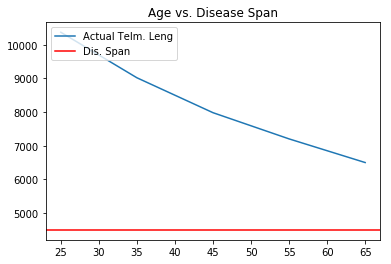

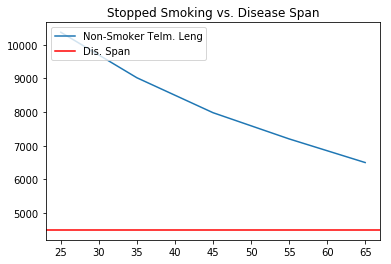

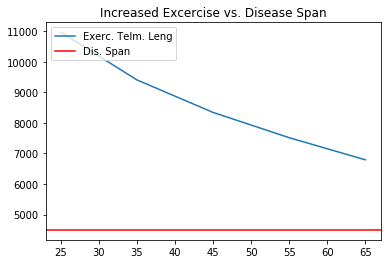

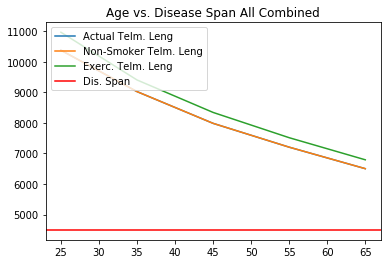

In [33]:
plot_disease_span(answers)